# <center>New York City Taxi Trip Duration</center>

# Содержание
- [Библиотеки](#lib)
- [Импорт данных](#import)
    - [Число пассажиров](#passenger_count)

<a id=lib></a>
## Библиотеки

In [22]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
#from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import roc_auc_score
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score

<a id=import></a>
## Импорт данных

In [3]:
# загрузка данных
train_df = pd.read_csv('D:/Kode/MO/train.csv', index_col='id')

<a id=explore_data></a>
## Исследование данных

In [5]:
train_df

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...
id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764


In [6]:
train_df.describe()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1458644,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,2016-04-01 10:10:24.940037120,2016-04-01 10:26:24.432310528,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
min,1.000000e+00,2016-01-01 00:00:17,2016-01-01 00:03:31,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,2016-02-17 16:46:04.249999872,2016-02-17 17:05:32.500000,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,2016-04-01 17:19:40,2016-04-01 17:35:12,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2016-05-15 03:56:08.750000128,2016-05-15 04:10:51.750000128,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,2016-06-30 23:59:39,2016-07-01 23:02:03,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06
std,4.987772e-01,NaN,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03


<a id=passenger_count></a>
### Количество пассажиров

Убираем выбросы

In [52]:
# разбиваем DataFrame по кол-ву пассажиров 
df_passenger_count_0 = train_df[train_df['passenger_count'] == 0]
df_passenger_count_1 = train_df[train_df['passenger_count'] == 1]
df_passenger_count_2 = train_df[train_df['passenger_count'] == 2]
df_passenger_count_3 = train_df[train_df['passenger_count'] == 3]
df_passenger_count_4 = train_df[train_df['passenger_count'] == 4]
df_passenger_count_5 = train_df[train_df['passenger_count'] == 5]
df_passenger_count_6 = train_df[train_df['passenger_count'] == 6]
df_passenger_count_7 = train_df[train_df['passenger_count'] == 7]
df_passenger_count_8 = train_df[train_df['passenger_count'] == 8]
df_passenger_count_9 = train_df[train_df['passenger_count'] == 9]

# оставлием строки из DataFrame соответствующие условию
df_passenger_count_0_no_out = df_passenger_count_0[(df_passenger_count_0['trip_duration'] - df_passenger_count_0['trip_duration'].mean()) < (2 * np.std(df_passenger_count_0['trip_duration']))]
df_passenger_count_1_no_out = df_passenger_count_1[(df_passenger_count_1['trip_duration'] - df_passenger_count_1['trip_duration'].mean()) < (2 * np.std(df_passenger_count_1['trip_duration']))]
df_passenger_count_2_no_out = df_passenger_count_2[(df_passenger_count_2['trip_duration'] - df_passenger_count_2['trip_duration'].mean()) < (2 * np.std(df_passenger_count_2['trip_duration']))]
df_passenger_count_3_no_out = df_passenger_count_3[(df_passenger_count_3['trip_duration'] - df_passenger_count_3['trip_duration'].mean()) < (2 * np.std(df_passenger_count_3['trip_duration']))]
df_passenger_count_4_no_out = df_passenger_count_4[(df_passenger_count_4['trip_duration'] - df_passenger_count_4['trip_duration'].mean()) < (2 * np.std(df_passenger_count_4['trip_duration']))]
df_passenger_count_5_no_out = df_passenger_count_5[(df_passenger_count_5['trip_duration'] - df_passenger_count_5['trip_duration'].mean()) < (2 * np.std(df_passenger_count_5['trip_duration']))]
df_passenger_count_6_no_out = df_passenger_count_6[(df_passenger_count_6['trip_duration'] - df_passenger_count_6['trip_duration'].mean()) < (2 * np.std(df_passenger_count_6['trip_duration']))]

# объединение таблиц
df_no_out = pd.concat([df_passenger_count_0_no_out,
                       df_passenger_count_1_no_out, df_passenger_count_2_no_out, df_passenger_count_3_no_out,
                       df_passenger_count_4_no_out, df_passenger_count_5_no_out, df_passenger_count_6_no_out,
                       df_passenger_count_7, df_passenger_count_8, df_passenger_count_9])


Распределение времени поездки в зависимости от количества пассажиров

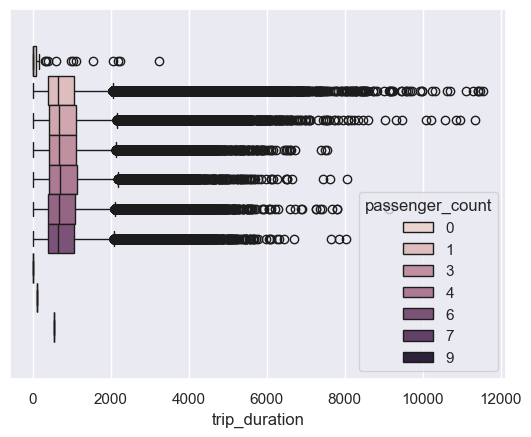

In [53]:
sns.boxplot(data=df_no_out, hue='passenger_count', x='trip_duration');

Распределение количества пассажиров в такси

<Axes: xlabel='passenger_count', ylabel='count'>

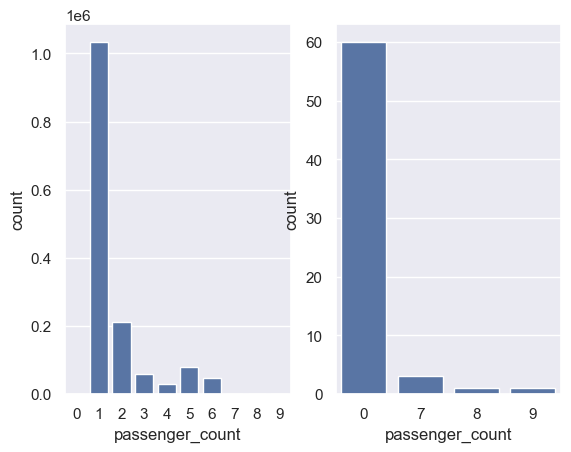

In [51]:
df_0789 = pd.concat([df_passenger_count_0, df_passenger_count_7, df_passenger_count_8, df_passenger_count_9])

plt.subplot(1, 2, 1)
sns.countplot(data=train_df, x='passenger_count')

plt.subplot(1, 2, 2)
sns.countplot(data=df_0789, x='passenger_count')


<a id=data_and_time></a>
### Дата и время посадки

In [ ]:
# преобразование в формат даты
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'])
train_df['dropoff_datetime'] = pd.to_datetime(train_df['dropoff_datetime'])
train_df.info() # пример получения даты: train_df['pickup_datetime'].iloc[1].month

<class 'pandas.core.frame.DataFrame'>
Index: 1458644 entries, id2875421 to id1209952
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   vendor_id           1458644 non-null  int64         
 1   pickup_datetime     1458644 non-null  datetime64[ns]
 2   dropoff_datetime    1458644 non-null  datetime64[ns]
 3   passenger_count     1458644 non-null  int64         
 4   pickup_longitude    1458644 non-null  float64       
 5   pickup_latitude     1458644 non-null  float64       
 6   dropoff_longitude   1458644 non-null  float64       
 7   dropoff_latitude    1458644 non-null  float64       
 8   store_and_fwd_flag  1458644 non-null  object        
 9   trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(1)
memory usage: 154.7+ MB
